<a href="https://colab.research.google.com/github/Raginm98/Ragin/blob/master/TS_Exogeneous_SARIMAX.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pmdarima

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 22.0 MB/s eta 0:00:00


In [2]:
import pandas as pd
import numpy as np
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt
import pmdarima as pm
from pmdarima import auto_arima

In [3]:
# Sample data creation (replace this with your actual data)
np.random.seed(42)
# date_range = pd.date_range(start='2020-01-01', periods=100, freq='D')
data = pd.read_csv('/content/wind_dataset.csv').dropna()
data = data.drop(columns=['IND','IND.1','IND.2'],axis=1)

data.set_index('DATE', inplace=True)

data.head(2)

,WIND,RAIN,T.MAX,T.MIN,T.MIN.G
DATE,,,,,
1961-01-01,13.67,0.2,9.5,3.7,-1.0
1961-01-02,11.50,5.1,7.2,4.2,1.1


In [4]:
# Separate training and testing data
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Define the target and exogenous variables
y_train = train_data['WIND']
X_train_exog1 = train_data['RAIN']
X_train_exog2 = train_data['T.MAX']
X_train_exog3 = train_data['T.MIN']
X_train_exog4 = train_data['T.MIN.G']


In [ ]:
# Fit separate ARIMA models for each exogenous variable
exog_var1_model = auto_arima(X_train_exog1, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
exog_var2_model = auto_arima(X_train_exog2, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
exog_var3_model = auto_arima(X_train_exog3, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)
exog_var4_model = auto_arima(X_train_exog4, seasonal=False, trace=True, error_action='ignore', suppress_warnings=True)


Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=inf, Time=8.60 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=25989.512, Time=0.19 sec
 ARIMA(1,0,0)(0,0,0)[0]             : AIC=25491.653, Time=0.39 sec
 ARIMA(0,0,1)(0,0,0)[0]             : AIC=25615.514, Time=0.89 sec
 ARIMA(2,0,0)(0,0,0)[0]             : AIC=25386.598, Time=0.72 sec
 ARIMA(3,0,0)(0,0,0)[0]             : AIC=25319.993, Time=1.30 sec
 ARIMA(4,0,0)(0,0,0)[0]             : AIC=25289.058, Time=3.96 sec
 ARIMA(5,0,0)(0,0,0)[0]             : AIC=25246.757, Time=2.52 sec
 ARIMA(5,0,1)(0,0,0)[0]             : AIC=inf, Time=19.83 sec
 ARIMA(4,0,1)(0,0,0)[0]             : AIC=inf, Time=8.12 sec
 ARIMA(5,0,0)(0,0,0)[0] intercept   : AIC=24931.238, Time=2.02 sec
 ARIMA(4,0,0)(0,0,0)[0] intercept   : AIC=24931.906, Time=1.09 sec
 ARIMA(5,0,1)(0,0,0)[0] intercept   : AIC=24932.339, Time=11.03 sec
 ARIMA(4,0,1)(0,0,0)[0] intercept   : AIC=24933.920, Time=2.48 sec

Best model:  ARIMA(5,0,0)(0,0,0)[0

In [ ]:
# Forecast each exogenous variable for the test period length
exog_var1_forecast = exog_var1_model.predict(n_periods=len(test_data))
exog_var2_forecast = exog_var2_model.predict(n_periods=len(test_data))
exog_var3_forecast = exog_var3_model.predict(n_periods=len(test_data))
exog_var4_forecast = exog_var4_model.predict(n_periods=len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/u

In [ ]:
 X_test_forecasted = pd.DataFrame({"DATE":test_data.index,
    'RAIN': exog_var1_forecast,
    'T.MAX': exog_var2_forecast,
    'T.MIN': exog_var3_forecast,
    'T.MIN.G': exog_var4_forecast,
}).reset_index(drop=True).set_index('DATE')

X_test_forecasted

,RAIN,T.MAX,T.MIN,T.MIN.G
DATE,,,,
1975-11-10,1.588649,11.322964,7.789837,0.599483
1975-11-11,1.686444,11.659561,7.307897,0.318167
1975-11-13,1.752033,11.844412,7.026633,0.255292
1975-11-14,1.781188,11.948816,6.939020,0.258566
1975-11-15,1.814490,12.010537,6.916634,0.281678
...,...,...,...,...
1978-12-27,1.855499,13.226558,6.348098,2.800756
1978-12-28,1.855499,13.226558,6.348098,2.800756
1978-12-29,1.855499,13.226558,6.348098,2.800756


In [ ]:
# # Combine the exogenous forecasts into a DataFrame for the test period
# X_test_forecasted = pd.DataFrame({
#     'RAIN': exog_var1_forecast,
#     'T.MAX': exog_var2_forecast,
#     'T.MIN': exog_var3_forecast,
#     'T.MIN.G': exog_var4_forecast,
# }, index=test_data.index)

# X_test_forecasted

In [ ]:
main_model = auto_arima(
    y=y_train,
    exogenous=train_data[['RAIN',	'T.MAX','T.MIN','T.MIN.G']],
    seasonal=False,
    trace=True,
    error_action='ignore',
    suppress_warnings=True,
    stepwise=True
)

In [ ]:
# Step 3: Forecast the Target Variable using Forecasted Exogenous Variables
forecast, conf_int = main_model.predict(n_periods=len(test_data), exogenous=X_test_forecasted, return_conf_int=True)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


Root Mean Square Error (RMSE): 5.085513251290024


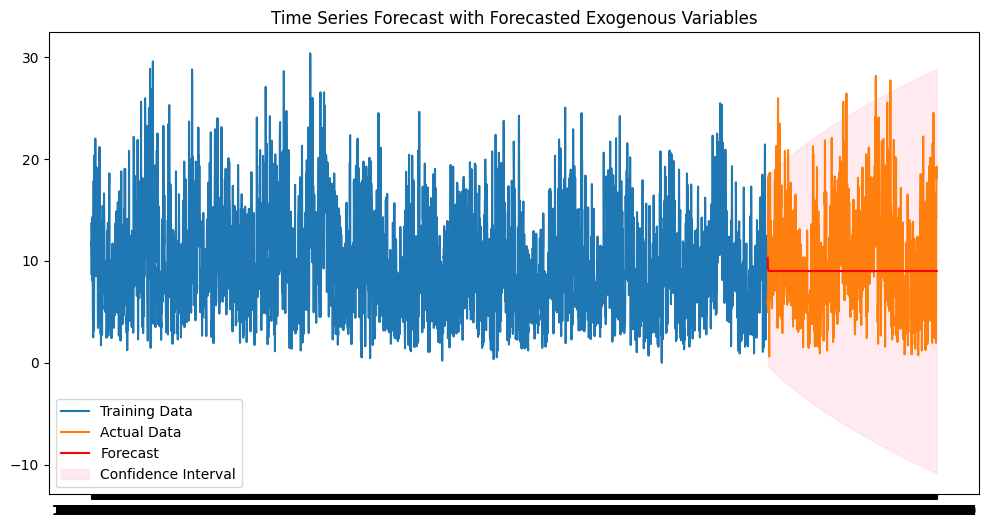

In [ ]:
# Evaluate the model performance
y_test = test_data['WIND']
rmse = sqrt(mean_squared_error(y_test, forecast))
print(f"Root Mean Square Error (RMSE): {rmse}")

# Plotting results
plt.figure(figsize=(12, 6))
plt.plot(train_data.index, y_train, label='Training Data')
plt.plot(test_data.index, y_test, label='Actual Data')
plt.plot(test_data.index, forecast, color='red', label='Forecast')
plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.title('Time Series Forecast with Forecasted Exogenous Variables')
plt.show()

Fitting SARIMAX model

In [22]:
# Separate training and testing data
train_size = int(len(data) * 0.8)
train_data = data[:train_size]
test_data = data[train_size:]

# Define the target and exogenous variables
y_train = train_data['WIND']
X_train_exog1 = train_data['RAIN']
X_train_exog2 = train_data['T.MAX']
X_train_exog3 = train_data['T.MIN']
X_train_exog4 = train_data['T.MIN.G']

In [23]:
# create and fit the model
# model1_fit = SARIMAX(X_train_exog1, order = (1,0,5)).fit()
sarimax_ex1 = SARIMAX(X_train_exog1,order = (5,0,0),seasonal_order = (0,0,0,0)).fit() #(5,0,0)(0,0,0)[0]
sarimax_ex2 = SARIMAX(X_train_exog2,order = (4,0,1),seasonal_order = (0,0,0,0)).fit()
sarimax_ex3 = SARIMAX(X_train_exog3,order = (4,0,1),seasonal_order = (0,0,0,0)).fit()
sarimax_ex4 = SARIMAX(X_train_exog4,order = (2,0,1),seasonal_order = (0,0,0,0)).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [24]:
sarimax_ex1.predict(len(test_data))

,predicted_mean
DATE,
1964-12-10,2.906529
1964-12-11,2.953211
1964-12-13,4.428573
1964-12-14,2.705149
1964-12-15,1.064637
...,...
1975-11-05,0.087842
1975-11-06,0.423874
1975-11-07,0.181787


In [25]:
test_data.shape

(1128, 5)

In [26]:
forecasts_ex1 = sarimax_ex1.predict()
forecasts_ex2 = sarimax_ex2.predict()
forecasts_ex3 = sarimax_ex3.predict()
forecasts_ex4 = sarimax_ex4.predict()

# create forecasts on test set (to evaluate how the model behaves to unknown-test data)
forecasts_on_ex1  = sarimax_ex1.forecast(len(test_data))
forecasts_on_ex2  = sarimax_ex2.forecast(len(test_data))
forecasts_on_ex3  = sarimax_ex3.forecast(len(test_data))
forecasts_on_ex4  = sarimax_ex4.forecast(len(test_data))

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-pa

In [27]:
print(test_data.index.min())
print(test_data.index.max())

1975-11-10
1978-12-31


In [28]:
X_test_forecasted = pd.DataFrame({"DATE":test_data.index,
    'RAIN': forecasts_on_ex1,
    'T.MAX': forecasts_on_ex2,
    'T.MIN': forecasts_on_ex3,
    'T.MIN.G': forecasts_on_ex4,
}).reset_index(drop=True).set_index('DATE')

X_test_forecasted

,RAIN,T.MAX,T.MIN,T.MIN.G
DATE,,,,
1975-11-10,3.749289e-01,11.280126,7.772005,0.430615
1975-11-11,1.879877e-01,11.601672,7.281547,0.073010
1975-11-13,1.719176e-01,11.764757,6.993850,-0.036036
1975-11-14,1.541842e-01,11.858502,6.891578,-0.068978
1975-11-15,1.922845e-01,11.910215,6.853832,-0.078621
...,...,...,...,...
1978-12-27,9.420116e-98,3.801545,0.348866,-0.000015
1978-12-28,7.728426e-98,3.797640,0.347939,-0.000015
1978-12-29,6.340534e-98,3.793740,0.347014,-0.000015


In [29]:
print(X_test_forecasted.index.min())
print(X_test_forecasted.index.max())

1975-11-10
1978-12-31


In [30]:
# create and fit the model
main_model_fit = SARIMAX(test_data['WIND'], exogenous=X_test_forecasted,
                           start_p=1, start_q=1,
                           test='adf',
                           max_p=3, max_q=3, m=8,
                           start_P=0, seasonal=True,
                           d=None, D=1,
                           trace=False,
                           error_action='ignore',
                           suppress_warnings=True,
                           stepwise=True).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/representation.py:374: FutureWarning: Unknown keyword arguments: dict_keys(['exogenous', 'start_p', 'start_q', 'test', 'max_p', 'max_q', 'm', 'start_P', 'seasonal', 'd', 'D', 'trace', 'error_action', 'suppress_warnings', 'stepwise']).Passing unknown keyword arguments will raise a TypeError beginning in version 0.15.
  warnings.warn(msg, FutureWarning)


In [31]:
fitted= main_model_fit.predict(n_periods=24,return_conf_int=True,exogenous=X_test_forecasted)

In [32]:
test_data['prediction'] = fitted
test_data

<ipython-input-32-68fc26560293>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['prediction'] = fitted


,WIND,RAIN,T.MAX,T.MIN,T.MIN.G,prediction
DATE,,,,,,
1975-11-10,6.13,24.7,7.9,7.5,2.6,0.000000
1975-11-11,5.66,2.7,9.4,4.1,-2.9,5.648920
1975-11-13,6.96,0.0,9.1,8.7,4.7,5.215806
1975-11-14,4.96,1.8,13.2,7.3,1.8,6.413782
1975-11-15,9.87,8.7,14.2,7.9,4.5,4.570741
...,...,...,...,...,...,...
1978-12-27,14.46,16.8,9.8,4.0,0.0,1.806180
1978-12-28,14.33,16.0,9.1,8.5,8.0,13.325185
1978-12-29,19.17,14.7,5.0,3.5,3.2,13.205388


In [33]:
y_test = test_data['WIND']
rmse = sqrt(mean_squared_error(y_test, fitted))
print(f"Root Mean Square Error (RMSE): {rmse}")

Root Mean Square Error (RMSE): 4.384364715356653


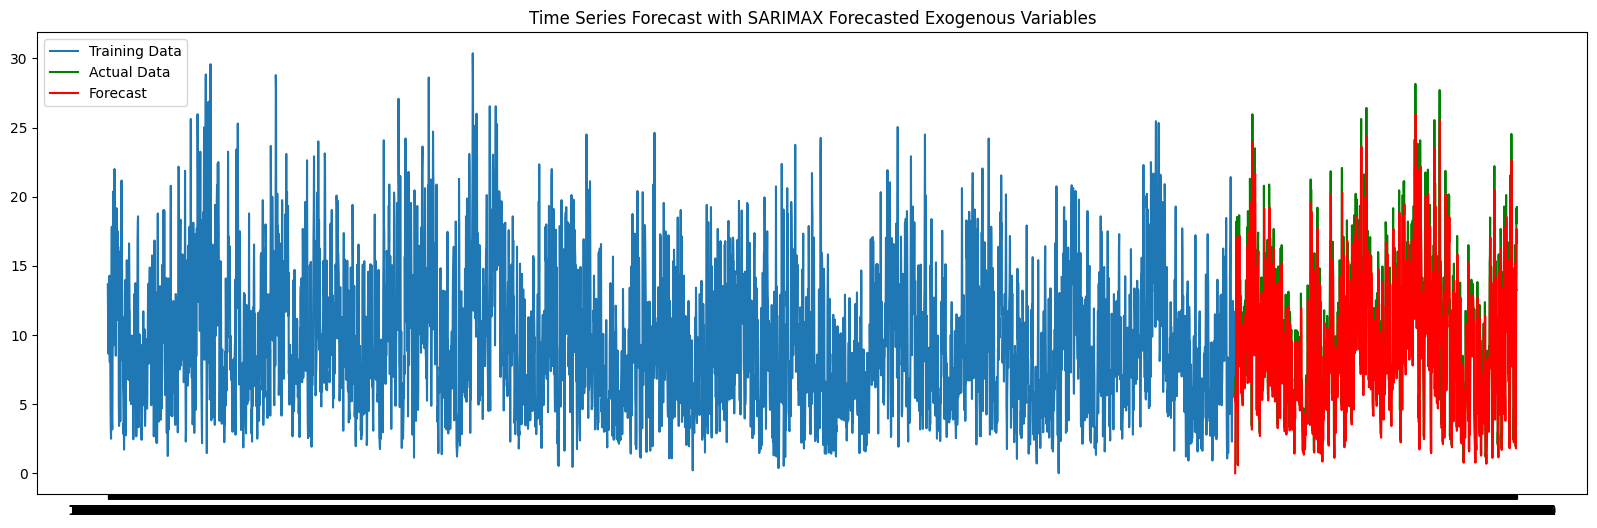

In [34]:
# Plotting results
plt.figure(figsize=(20, 6))
plt.plot(train_data.index, y_train, label='Training Data')
plt.plot(test_data.index, y_test, label='Actual Data',color = 'green')
plt.plot(test_data.index, fitted, color='red', label='Forecast')
# plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.title('Time Series Forecast with SARIMAX Forecasted Exogenous Variables')
plt.show()

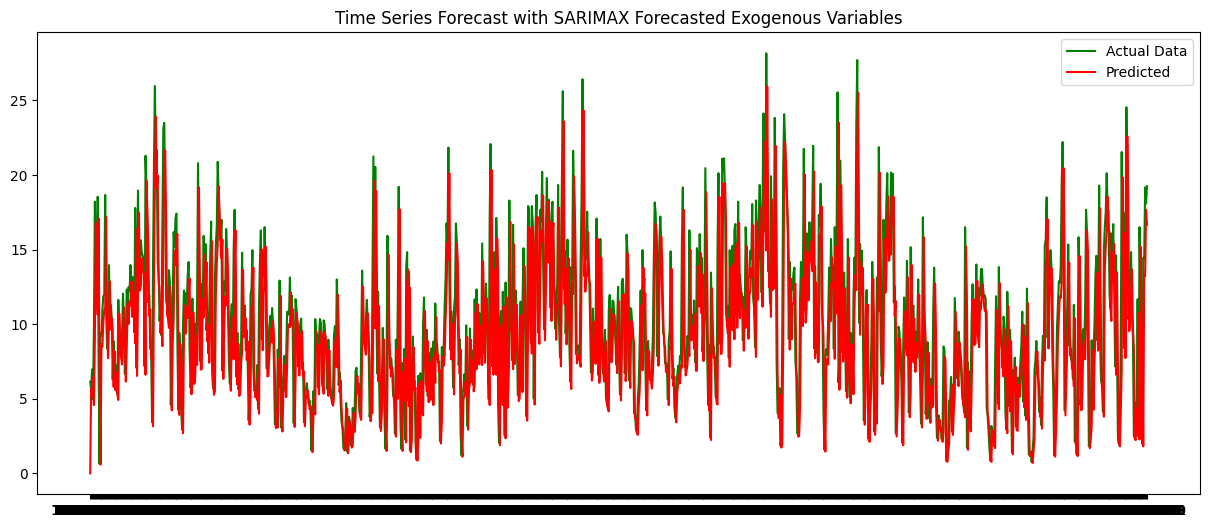

In [35]:
plt.figure(figsize=(15, 6))
# plt.plot(train_data.index, y_train, label='Training Data')
plt.plot(test_data.index, y_test, label='Actual Data',color = 'green')
plt.plot(test_data.index, fitted, color='red', label='Predicted')
# plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.title('Time Series Forecast with SARIMAX Forecasted Exogenous Variables')
plt.show()

In [51]:
y_test_filterd = y_test[(y_test.index >= "1976-01-01") & (y_test.index <= "1976-02-01")]
fitted_filterd = fitted[(fitted.index >= "1976-01-01") & (fitted.index <= "1976-02-01")]
filtered_data = test_data[(test_data.index >= "1976-01-01") & (test_data.index <= "1976-02-01")]

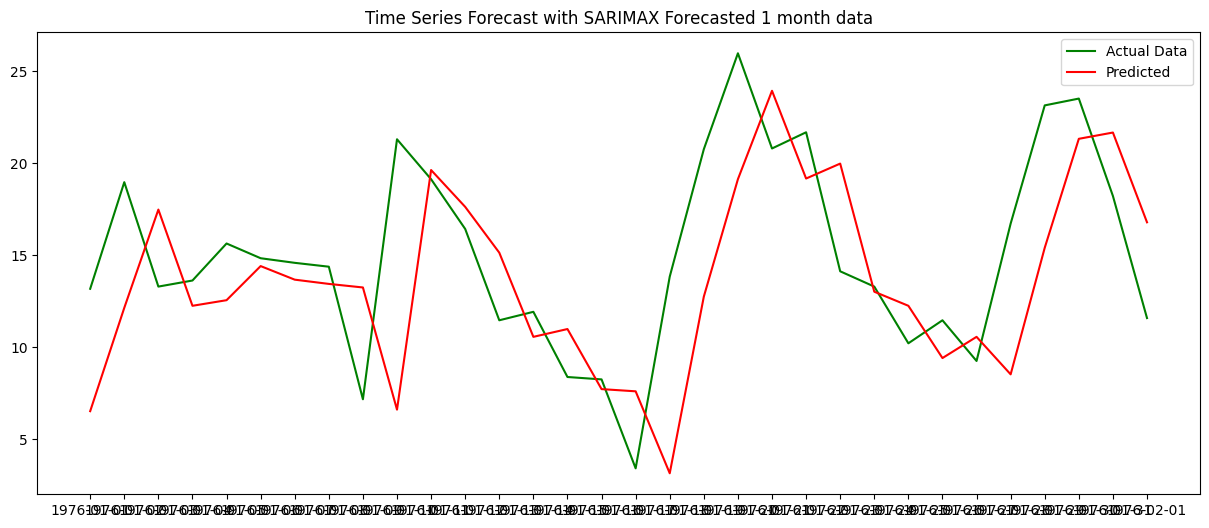

In [52]:
plt.figure(figsize=(15, 6))
# plt.plot(train_data.index, y_train, label='Training Data')
plt.plot(filtered_data.index, y_test_filterd, label='Actual Data',color = 'green')
plt.plot(filtered_data.index, fitted_filterd, color='red', label='Predicted')
# plt.fill_between(test_data.index, conf_int[:, 0], conf_int[:, 1], color='pink', alpha=0.3, label='Confidence Interval')
plt.legend()
plt.title('Time Series Forecast with SARIMAX Forecasted 1 month data')
plt.show()

DATA ANALYSIS

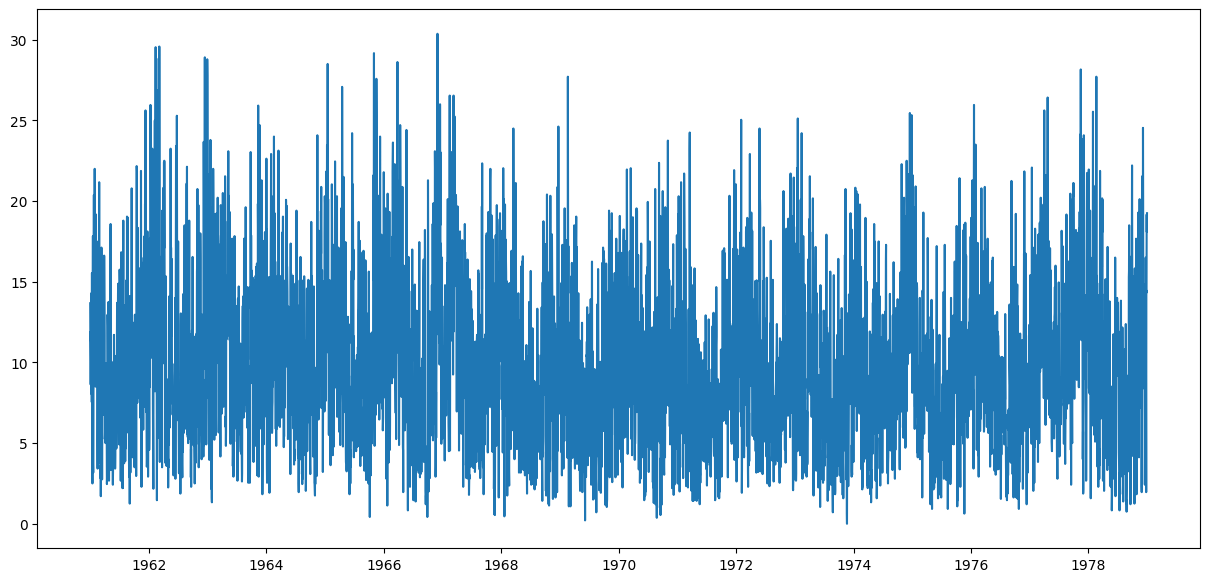

In [ ]:
plt.figure(figsize=(15,7))

plt.plot(df['WIND'])
plt.show()

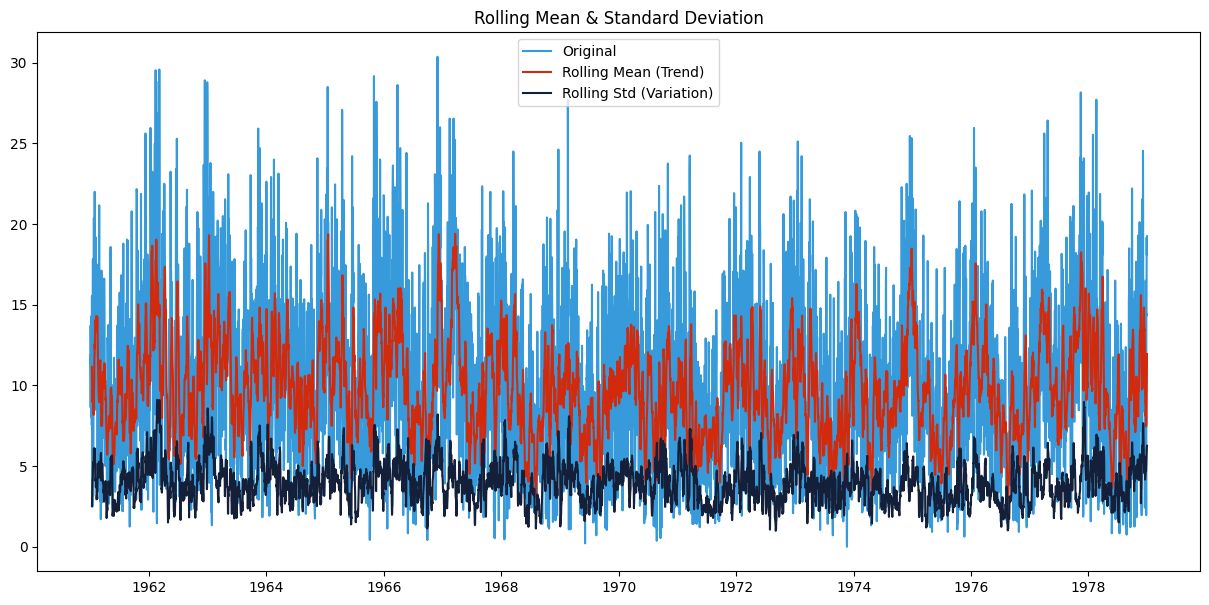

In [ ]:
#Determine rolling statistics
df_copy = df.copy()
df_copy["rolling_avg"] = df_copy["WIND"].rolling(window=12).mean() #window size 12 denotes 12 months, giving rolling mean at yearly level
df_copy["rolling_std"] = df_copy["WIND"].rolling(window=12).std()

#Plot rolling statistics
plt.figure(figsize=(15,7))
plt.plot(df_copy["WIND"], color='#379BDB', label='Original')
plt.plot(df_copy["rolling_avg"], color='#D22A0D', label='Rolling Mean (Trend)')
plt.plot(df_copy["rolling_std"], color='#142039', label='Rolling Std (Variation)')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

Staionarity Test

In [ ]:
#Augmented Dickey–Fuller test:
print('Results of Dickey Fuller Test:')
dftest = adfuller(df['WIND'], autolag='AIC')

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value

print(dfoutput)

if dfoutput['p-value']>0.05:
  print('Data is not stationary')
else:
  print('Data is stationary')

Results of Dickey Fuller Test:
Test Statistic                -8.413013e+00
p-value                        2.079234e-13
#Lags Used                     3.500000e+01
Number of Observations Used    6.538000e+03
Critical Value (1%)           -3.431351e+00
Critical Value (5%)           -2.861982e+00
Critical Value (10%)          -2.567005e+00
dtype: float64
Data is stationary


Text(0.5, 1.0, 'residuals')

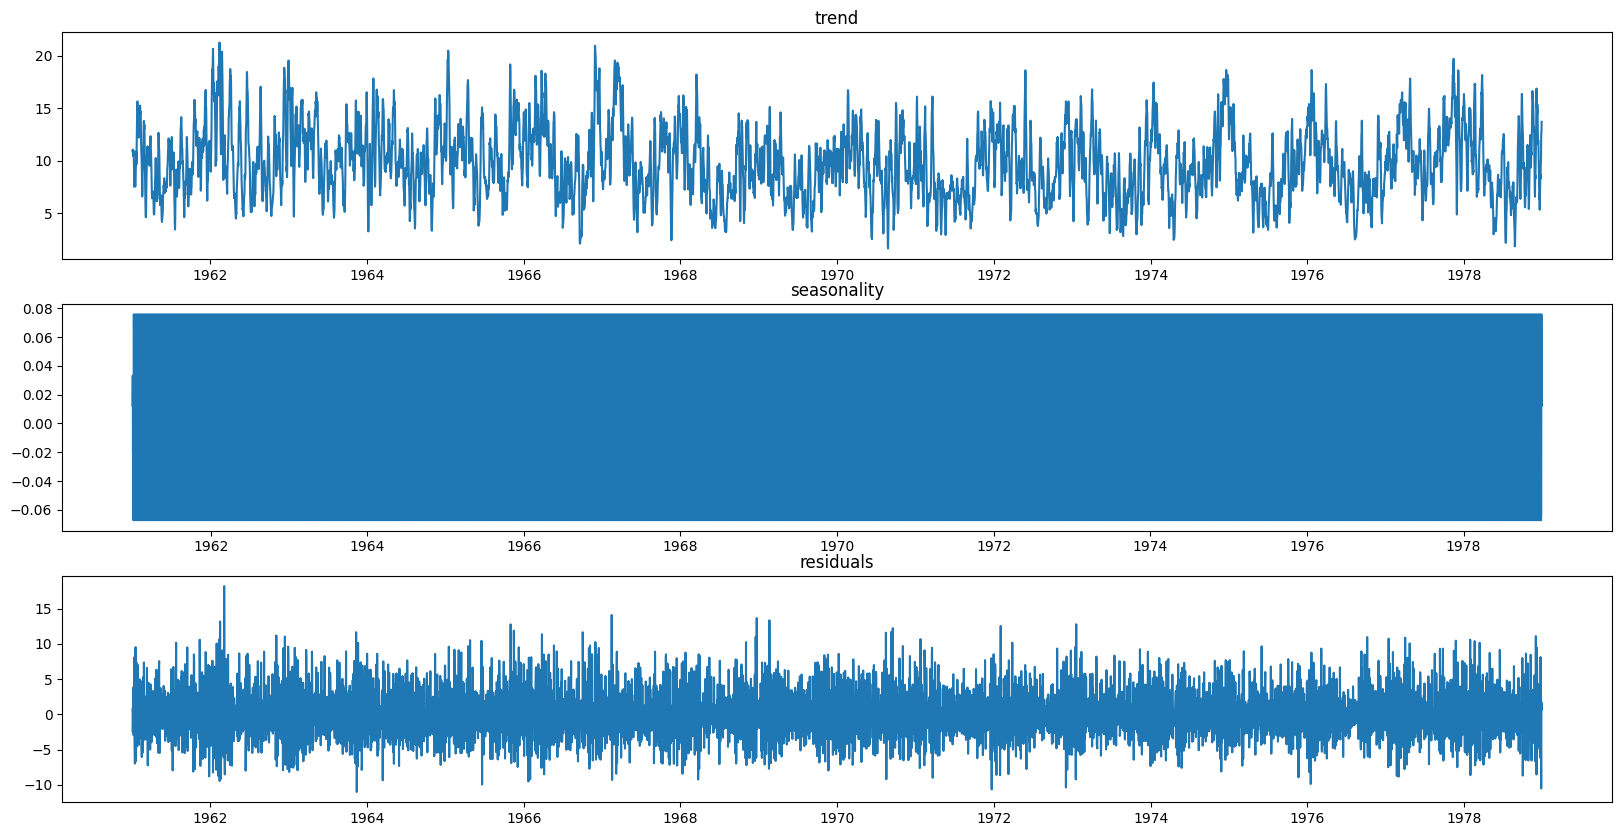

In [ ]:
# import the necessary module
from statsmodels.tsa.seasonal import seasonal_decompose

# decompose the time series into its trend, seasonal and residuals components
result_decompose = seasonal_decompose(df['WIND'], model='additive')
trend     = result_decompose.trend
seasonal  = result_decompose.seasonal
residuals = result_decompose.resid

# plot every component
plt.figure(figsize=(20,10))

plt.subplot(311)
plt.plot(trend)
plt.title('trend')

plt.subplot(312)
plt.plot(seasonal)
plt.title('seasonality')

plt.subplot(313)
plt.plot(residuals)
plt.title('residuals')

In [ ]:
# we will forecast the last 10 days

testing_timeframe = 10

train = df[:-testing_timeframe]
test  = df[-testing_timeframe:]
print('training set (past data): ', len(train))
print('test set (days to be forecasted ahead): ', len(test))

training set (past data):  6564
test set (days to be forecasted ahead):  10


In [ ]:
# import necessary modules
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# define function that returns the ACF and PACF plots for a given time series
def autocorrelation_plots(timeseries, description, n_lags):
    plt.figure(figsize=(15,5))
    plt.subplot(121)
    plot_acf(timeseries, ax=plt.gca(), lags=n_lags)
    plt.title('Autocorrelation ({})'.format(description))
    plt.xlabel('Number of lags')
    plt.ylabel('correlation')
    plt.subplot(122)
    plot_pacf(timeseries, ax=plt.gca(), lags=n_lags)
    plt.title('Partial Autocorrelation ({})'.format(description))
    plt.xlabel('Number of lags')
    plt.ylabel('correlation')
    plt.show()

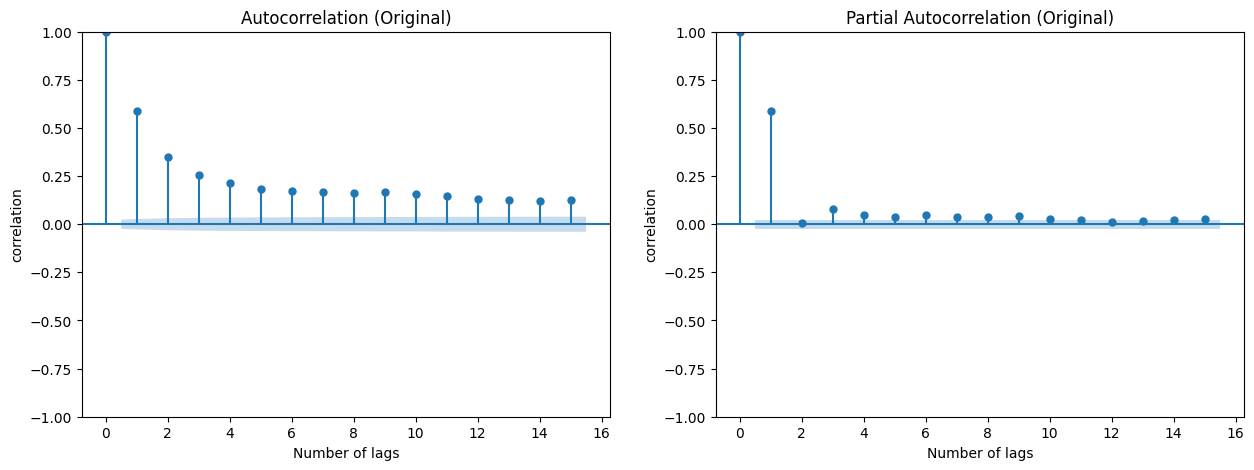

In [ ]:
autocorrelation_plots(train['WIND'],'Original',15)

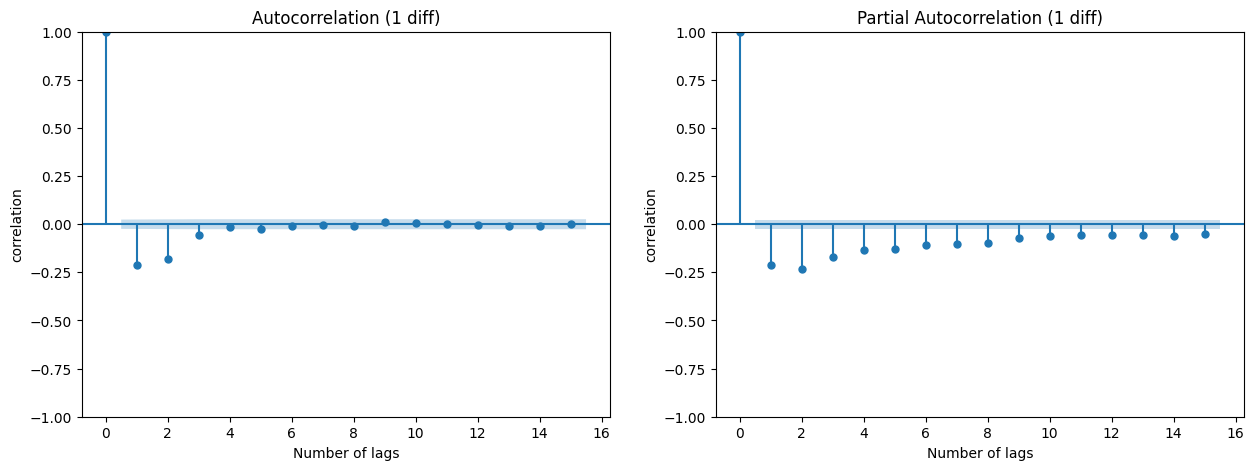

In [ ]:
autocorrelation_plots(train['WIND'].diff().dropna(),'1 diff',15)

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# create and fit the model
model_fit = SARIMAX(train['WIND'], order = (1,0,5)).fit()

print(model_fit.summary())
print('\n')
# create forecasts on training set (to evaluate how the model behaves to known-training data)
forecasts_on_train = model_fit.predict()

# create forecasts on test set (to evaluate how the model behaves to unknown-test data)
forecasts_on_test  = model_fit.forecast(len(test))

# calculate the root mean squared error on the test set
RMSE = np.sqrt(mean_squared_error(test['WIND'], forecasts_on_test))

# print the AIC and RMSE
print('AIC: ' , model_fit.aic)
print('RMSE: ', RMSE)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   WIND   No. Observations:                 6564
Model:               SARIMAX(1, 0, 5)   Log Likelihood              -18391.155
Date:                Wed, 30 Oct 2024   AIC                          36796.309
Time:                        08:03:49   BIC                          36843.834
Sample:                    01-01-1961   HQIC                         36812.739
                         - 12-21-1978                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9997      0.000   2775.287      0.000       0.999       1.000
ma.L1         -0.4326      0.012    -36.891      0.000      -0.456      -0.410
ma.L2         -0.2929      0.013    -23.234      0.0

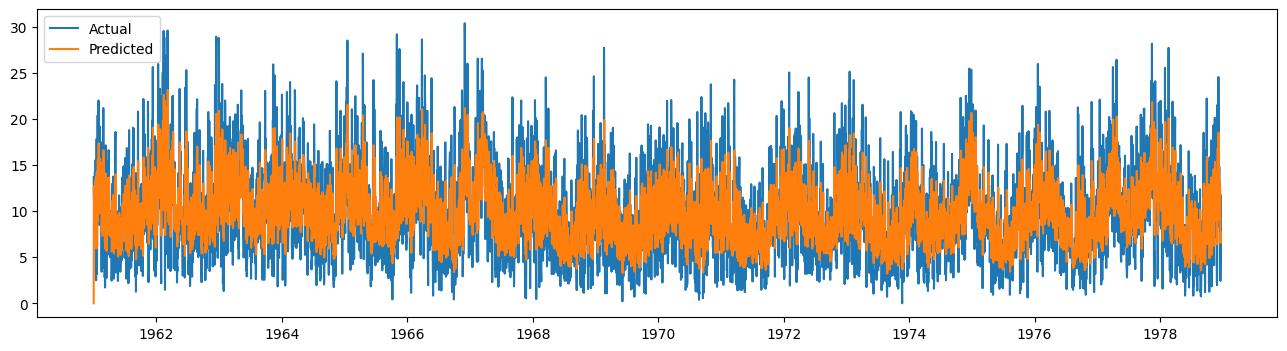

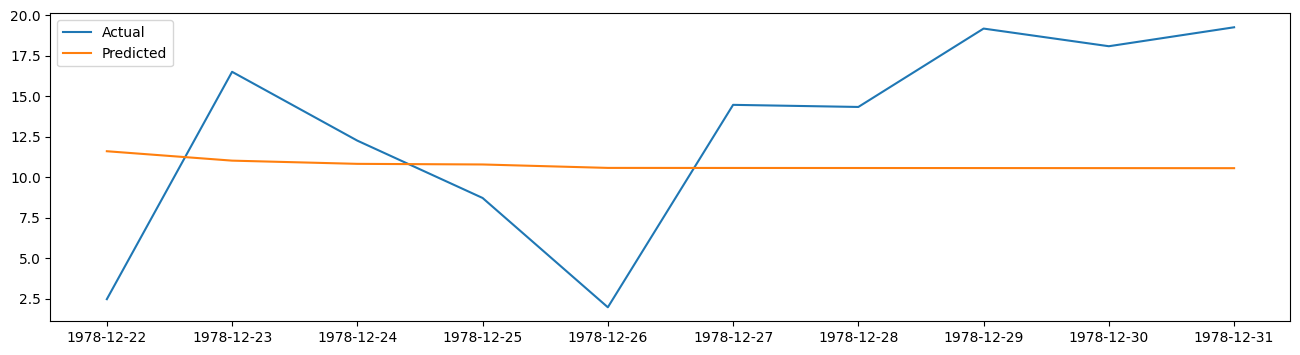

In [ ]:
# on train data
plt.figure(figsize=(16,4))
plt.plot(train['WIND'], label="Actual")
plt.plot(forecasts_on_train, label="Predicted")
plt.legend()

# on test data
plt.figure(figsize=(16,4))
plt.plot(test['WIND'], label="Actual")
plt.plot(forecasts_on_test, label="Predicted")
plt.legend()

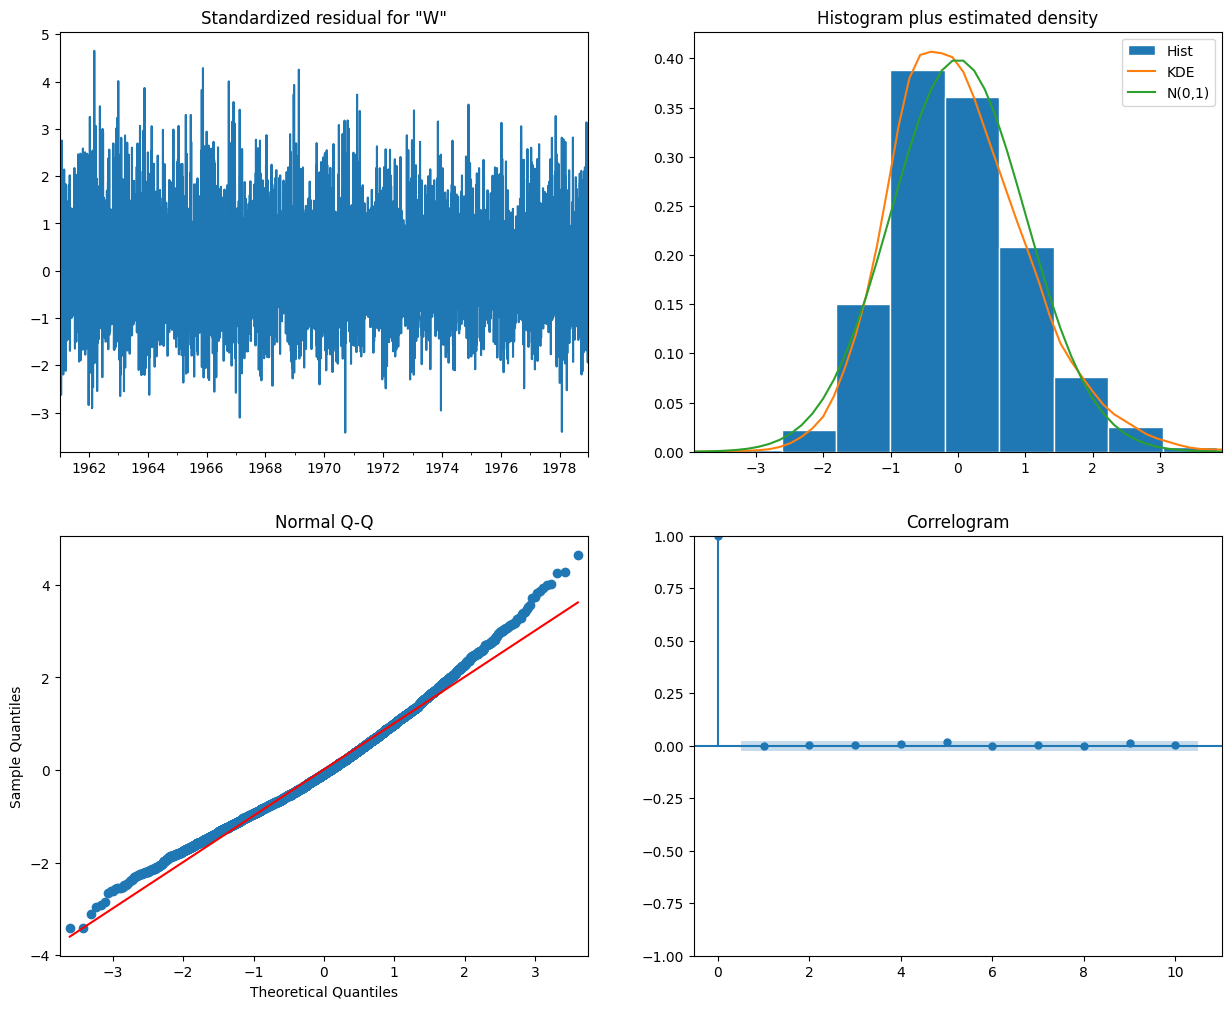

In [ ]:
model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
sarimax = SARIMAX(train['WIND'],
                    order = (1,0,5),
                    seasonal_order = (1,1,0,8)
                   ).fit()

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


In [ ]:
forecasts_on_train = sarimax.predict()

# create forecasts on test set (to evaluate how the model behaves to unknown-test data)
forecasts_on_test  = sarimax.forecast(len(test))

# calculate the root mean squared error on the test set
RMSE = np.sqrt(mean_squared_error(test['WIND'], forecasts_on_test))

# print the AIC and RMSE
print('AIC: ' , sarimax.aic)
print('RMSE: ', RMSE)

AIC:  39233.50402003038
RMSE:  6.2727923802296335


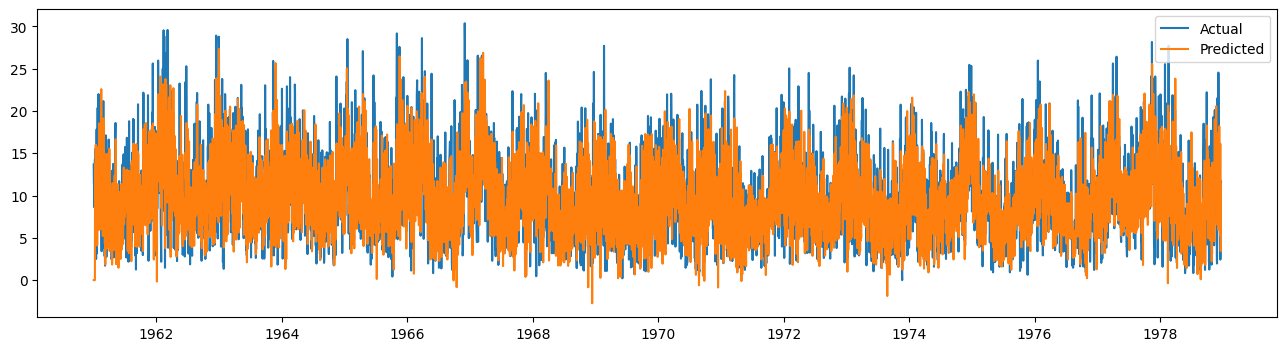

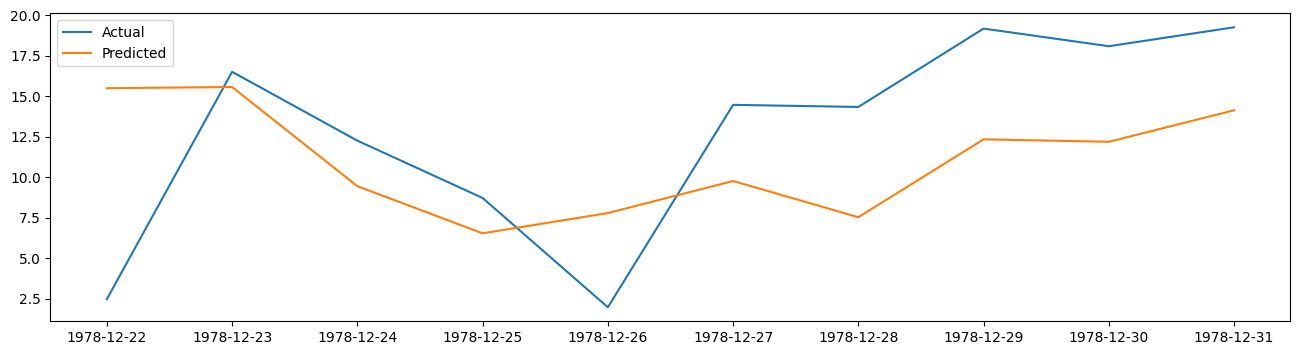

In [ ]:
plt.figure(figsize=(16,4))
plt.plot(train['WIND'], label="Actual")
plt.plot(forecasts_on_train, label="Predicted")
plt.legend()

# on test data
plt.figure(figsize=(16,4))
plt.plot(test['WIND'], label="Actual")
plt.plot(forecasts_on_test, label="Predicted")
plt.legend()

In [ ]:
# define the exogenous variables
exog_var_train = train[['RAIN','T.MAX','T.MIN','T.MIN.G']].ffill()
exog_var_test  = test[['RAIN','T.MAX','T.MIN','T.MIN.G']].ffill()

# create and fit the model
model_fit = SARIMAX(train['WIND'],
                    order = (1,0,5),
                    seasonal_order = (1,1,0,8),
                    exog = exog_var_train
                   ).fit()

print(model_fit.summary())

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               WIND   No. Observations:                 6564
Model:             SARIMAX(1, 0, 5)x(1, 1, [], 8)   Log Likelihood              -19362.795
Date:                            Wed, 30 Oct 2024   AIC                          38749.589
Time:                                    08:11:23   BIC                          38831.047
Sample:                                01-01-1961   HQIC                         38777.751
                                     - 12-21-1978                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
RAIN           0.0492      0.010      4.969      0.000       0.030       0.069
T.MAX          0.0079      0.025   

In [ ]:
forecasts_on_train = model_fit.predict()

# create forecasts on test set (to evaluate how the model behaves to unknown-test data)
forecasts_on_test  = model_fit.forecast(len(test), exog = exog_var_test)

# calculate the root mean squared error on the test set
RMSE = np.sqrt(mean_squared_error(test['WIND'], forecasts_on_test))

# print the AIC and RMSE
print('AIC: ' , model_fit.aic)
print('RMSE: ', RMSE)

AIC:  38749.589013410674
RMSE:  5.590099431845111


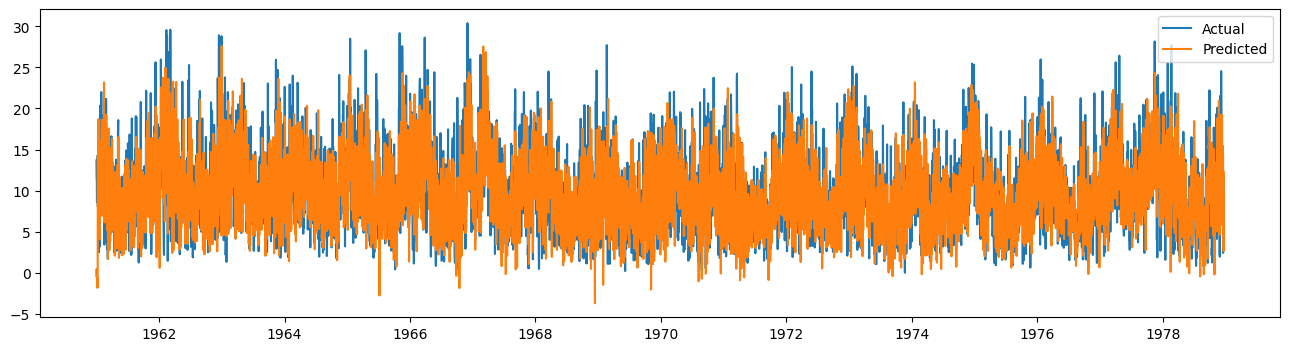

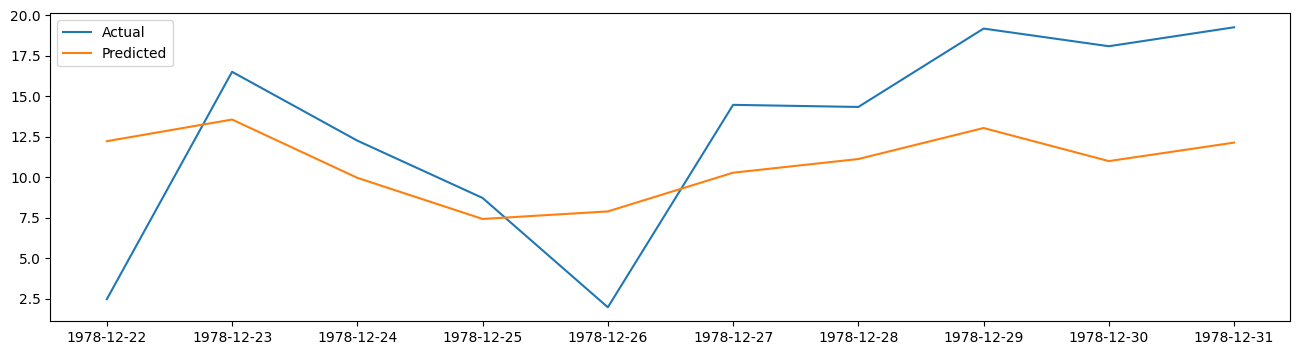

In [ ]:

#plot on train data
plt.figure(figsize=(16,4))
plt.plot(train['WIND'], label="Actual")
plt.plot(forecasts_on_train, label="Predicted")
plt.legend()

# on test data
plt.figure(figsize=(16,4))
plt.plot(test['WIND'], label="Actual")
plt.plot(forecasts_on_test, label="Predicted")
plt.legend()

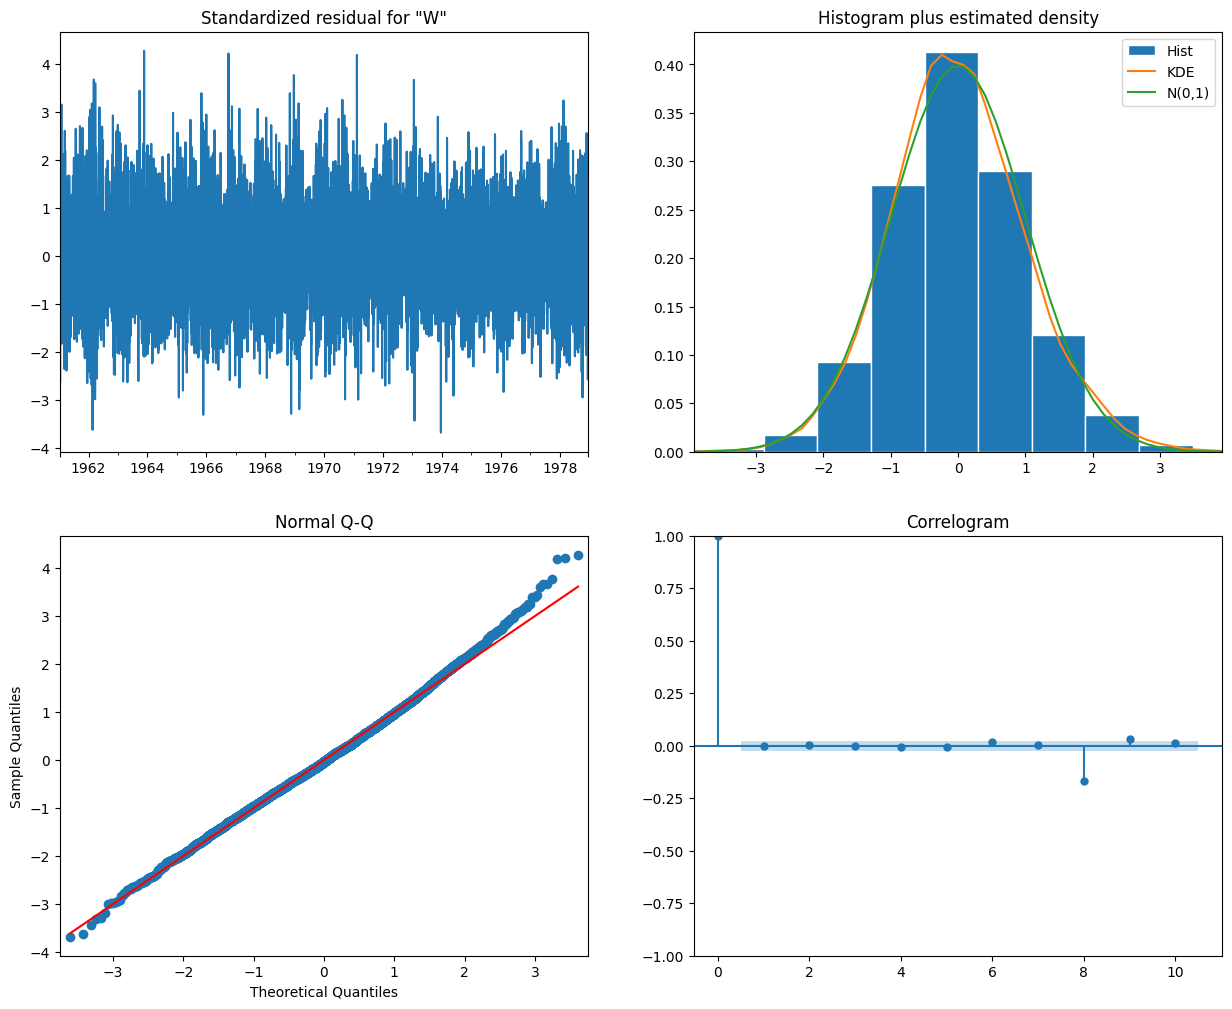

In [ ]:
model_fit.plot_diagnostics(figsize=(15,12))
plt.show()

In [ ]:
# Standardized residual: There are no obvious patterns in the residuals.
# Histogram plus kde estimate: The KDE curve should be very similar to the normal distribution.
# Normal Q-Q: Most of the data points should lie on the straight line.
# Correlogram: 95% of correlations for lag greater than one should not be significant.